In [56]:
# Importing necessary libraries for data analysis and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Data Pre-processing**

In [57]:
# Loading the dataset
data = pd.read_csv("Bengaluru_House_Data.csv")
# Display the first few rows of the dataset to understand its structure
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [58]:
# Checking the Shape of our dataset, number of rows and columns
data.shape

(13320, 9)

In [59]:
#Checking Data-type of each column/feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [60]:
#Dropping Columns which are not required
data = data.drop(columns=['society','availability'],axis=1)

In [61]:
data.head(1)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07


In [62]:
# The below function will simply remove the '-' from each row in total_sqft column and convert it's data type to float 
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [63]:
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num) # Calling our function
data = data[data.total_sqft.notnull()]
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [64]:
data.describe() 

,total_sqft,bath,balcony,price
count,13274.000000,13201.000000,12669.000000,13274.000000
mean,1559.626694,2.691160,1.585682,112.453654
std,1238.405258,1.338867,0.816734,149.070368
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1276.000000,2.000000,2.000000,72.000000
75%,1680.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


In [65]:
data.isnull().sum() # Checking for null values

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       605
price           0
dtype: int64

In [66]:
#Data clean: handling null values
data = data.dropna()

In [67]:
data.area_type.unique()

array(['Super built-up Area', 'Plot Area', 'Built-up Area', 'Carpet Area'],
      dtype=object)

In [68]:
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [69]:
len(data.location.unique())

1259

In [70]:
location_count = data.groupby('location').size().sort_values(ascending=False) # Grouping Locations to get the count of each.
location_count

location
Whitefield              513
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          259
Thanisandra             230
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Length: 1259, dtype: int64

In [71]:
len(location_count[location_count<=10])

1024

In [72]:
location_less_10 = location_count[location_count<=10]

In [73]:
#if the location have less than 10 or 10 houses than that location are known as other location
data.location = data.location.apply(lambda x: 'other' if x in location_less_10 else x)

In [74]:
len(data.location.unique())

236

In [75]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [76]:
data['size'] = data['size'].apply(lambda x: int(x.split(' ')[0])) #Removing non-numeric values from size column


In [77]:
data['size'].unique

<bound method Series.unique of 0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13317    2
13318    4
13319    1
Name: size, Length: 12668, dtype: int64>

In [78]:
data.head(1)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07


In [79]:
import seaborn as sns

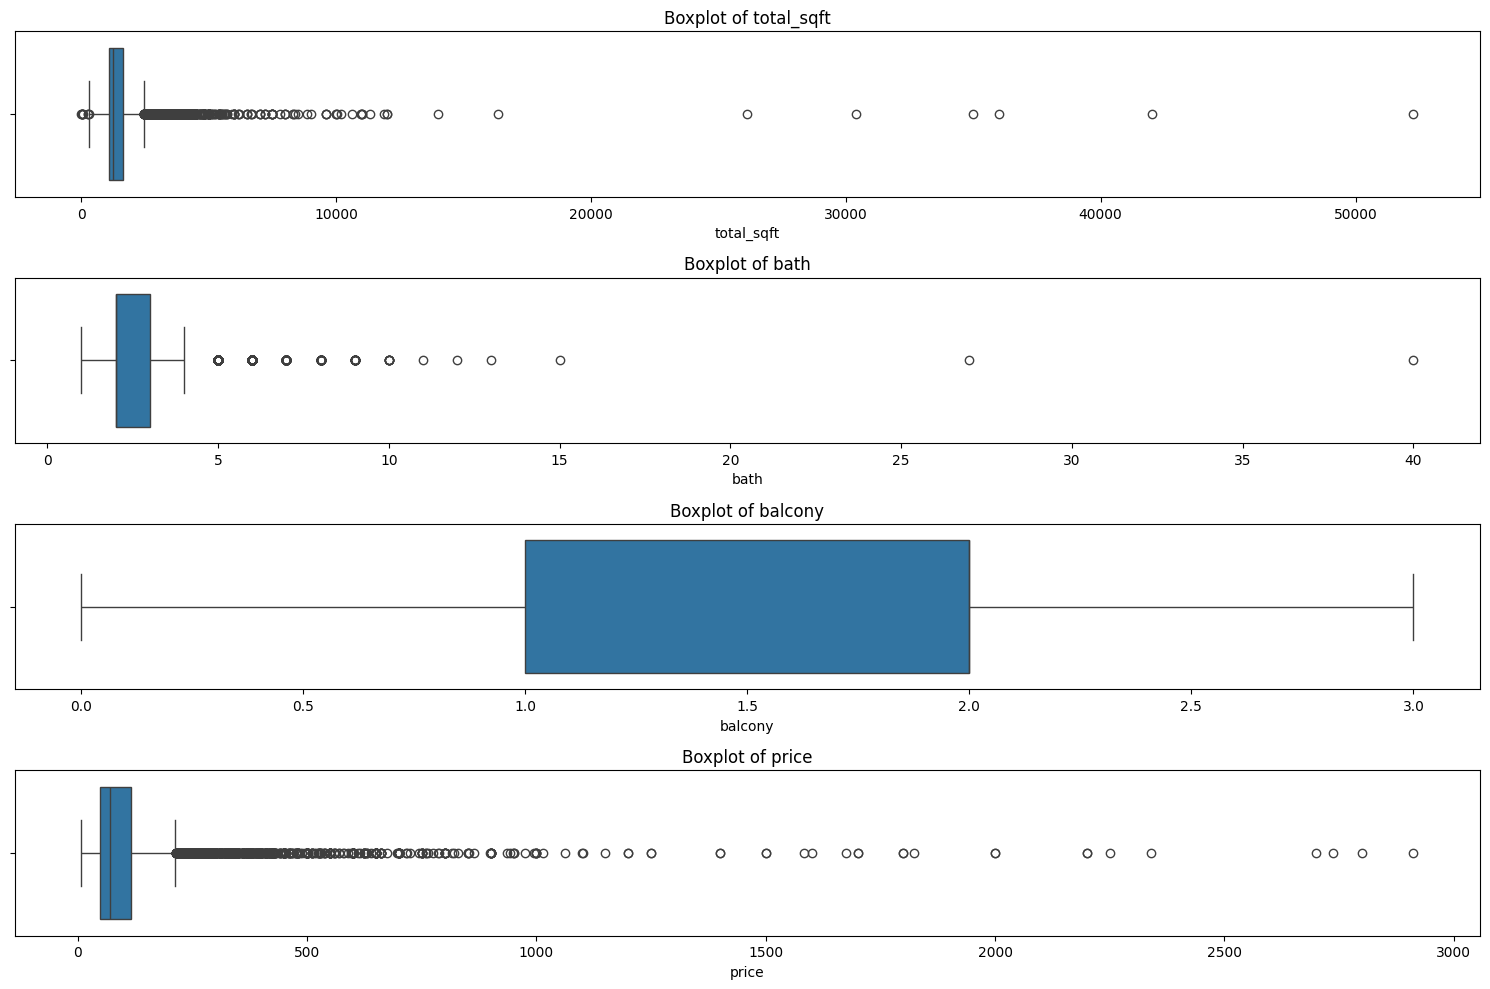

In [80]:
# List of numerical columns to visualize outliers
numeric_cols = ['total_sqft', 'bath', 'balcony', 'price']

# Set the plot size
plt.figure(figsize=(15, 10))

# Create boxplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [81]:
#Removing outliers using standard deviation from price column
upper_limit = data.price.mean() + data.price.std()
lower_limit = data.price.mean() - data.price.std()
data = data[data.price<upper_limit] 
data = data[data.price > lower_limit]

In [82]:
#Removing outliers using standard deviation from sqft column
upper_limit = data.total_sqft.mean() + data.total_sqft.std()
lower_limit = data.total_sqft.mean() - data.total_sqft.std()
data = data[data.total_sqft<upper_limit] 
data = data[data.total_sqft > lower_limit]

In [83]:
data.head(1)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07


In [84]:
import warnings
warnings.filterwarnings("ignore")


**Data Visualization**

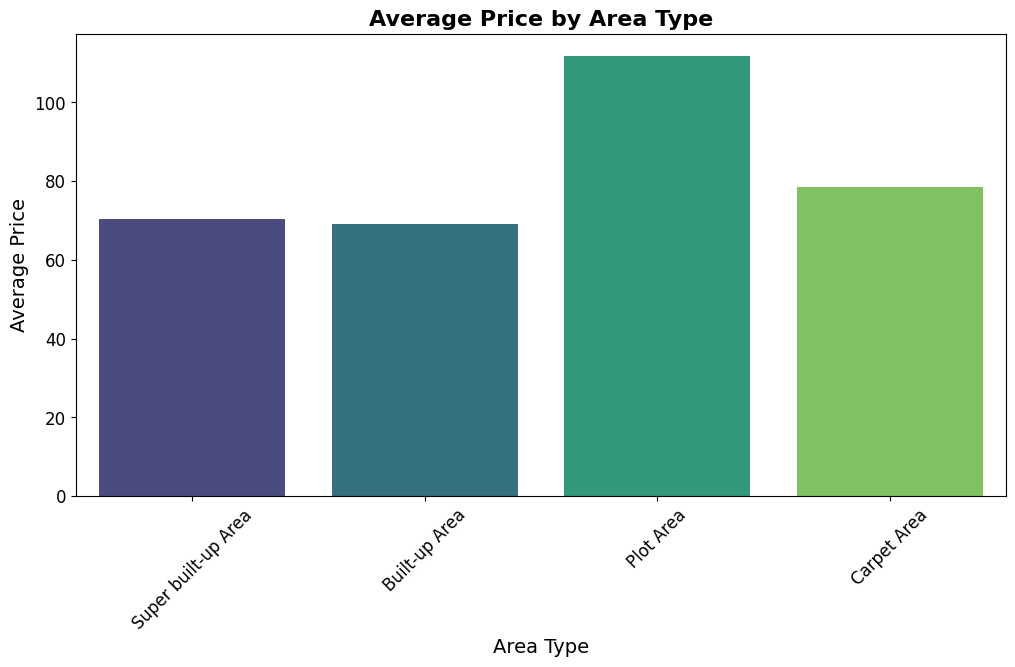

In [85]:
# Setting the figure size for better readability
plt.figure(figsize=(12, 6))


palette = sns.color_palette("viridis", len(data['area_type'].unique()))

# Creating a bar plot to show the average price for each area type with different colors
sns.barplot(x='area_type', y='price', data=data, estimator=np.mean, ci=None, palette=palette)


plt.title('Average Price by Area Type', fontsize=16, fontweight='bold')
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Average Price', fontsize=14)


plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12)
plt.show()




This bar chart displays the average price of properties categorized by different area types. The 'Plot Area' type shows the highest average price, followed by 'Super built-up Area', 'Built-up Area', and 'Carpet Area'. This suggests that properties classified under 'Plot Area' are generally more expensive compared to the other types.

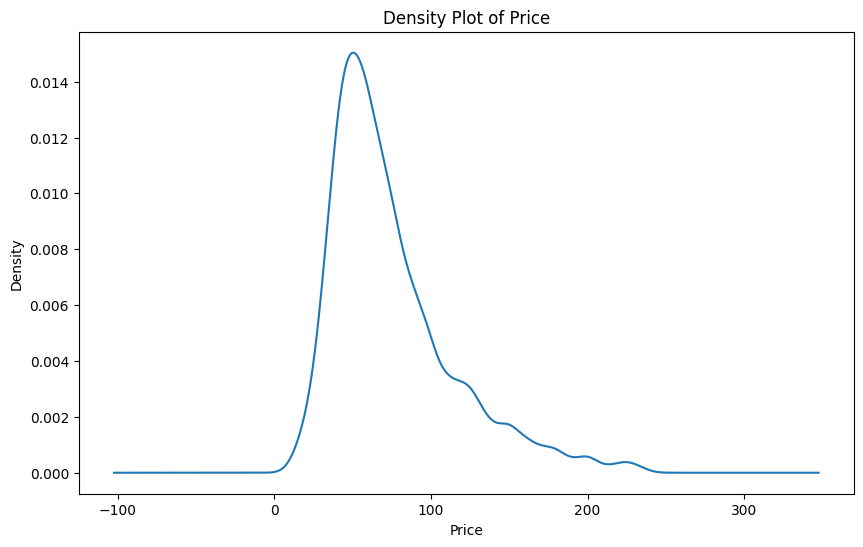

In [86]:
#Density Plot using Matplotlib
plt.figure(figsize=(10, 6))
data['price'].plot(kind='density')
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.show()

This density plot illustrates the distribution of property prices in the dataset. The peak indicates that most property prices cluster around a certain value, with fewer properties priced significantly higher or lower. The right-skewed nature of the plot suggests that there are some high-priced properties, but they are less common compared to lower-priced ones.

In [87]:
import plotly_express as px

In [88]:
fig_scatter = px.scatter(data, x='total_sqft', y='price', color='location', title='Price vs Total Square Feet')
fig_scatter.show()

This scatter plot depicts the relationship between property prices and their total square footage, with different colors representing various locations. Generally, there is a positive correlation: as the total square feet of a property increases, the price tends to increase. However, the spread of points also indicates significant variation in prices for similar square footage, likely influenced by the location.

In [89]:
# Grouping the locations and calculating average price
expensive_places = data.groupby('location')['price'].mean().sort_values(ascending=False).head(5).reset_index()


fig1 = px.bar(expensive_places, x='location', y='price', color='location',
              title='Top 5 Most Expensive Places',
              labels={'location': 'Location', 'price': 'Average Price'},
              color_discrete_sequence=px.colors.qualitative.Prism)

fig1.show()


The bar chart illustrates the top 5 most expensive locations based on average property prices. Each bar represents one of these locations, with the height of the bar indicating how high the average price is.

In [90]:
import plotly.graph_objects as go
import plotly.express as px

# Group by location and counting the number of sales.
most_selling_places = data[data['location'] != 'other']['location'].value_counts().head(5).reset_index()
most_selling_places.columns = ['location', 'count']


fig2 = go.Figure(data=[go.Pie(labels=most_selling_places['location'], values=most_selling_places['count'],
                              hoverinfo='label+percent', textinfo='value', textfont_size=20,
                              marker=dict(colors=px.colors.qualitative.Prism))])

fig2.update_layout(title='Top 5 Places with the Highest Number of Sales')
fig2.show()


The pie chart shows the top 5 locations with the most property sales. Each slice represents one location and its share of the total sales, making it easy to see how each location contributes to the overall sales volume.

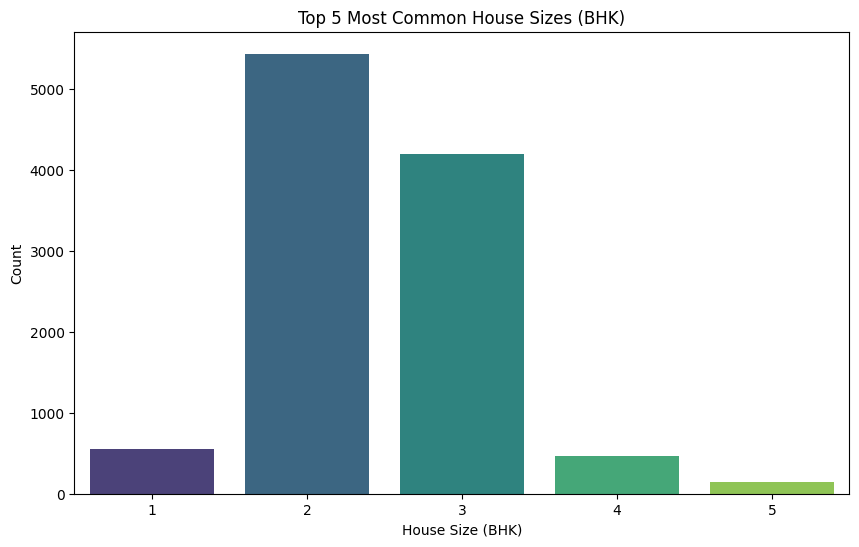

In [91]:
# Counting the most common house sizes based on size in BHK
most_common_sizes = data['size'].value_counts().head(5).reset_index()
most_common_sizes.columns = ['size', 'count']


plt.figure(figsize=(10, 6))
sns.barplot(data=most_common_sizes, x='size', y='count', palette='viridis')
plt.title('Top 5 Most Common House Sizes (BHK)')
plt.xlabel('House Size (BHK)')
plt.ylabel('Count')
plt.show()


The bar chart shows the top 5 most popular house sizes in terms of bedrooms (BHK). It helps us to see which sizes are most common, making it easier for buyers and sellers to understand market trends and make informed decisions.

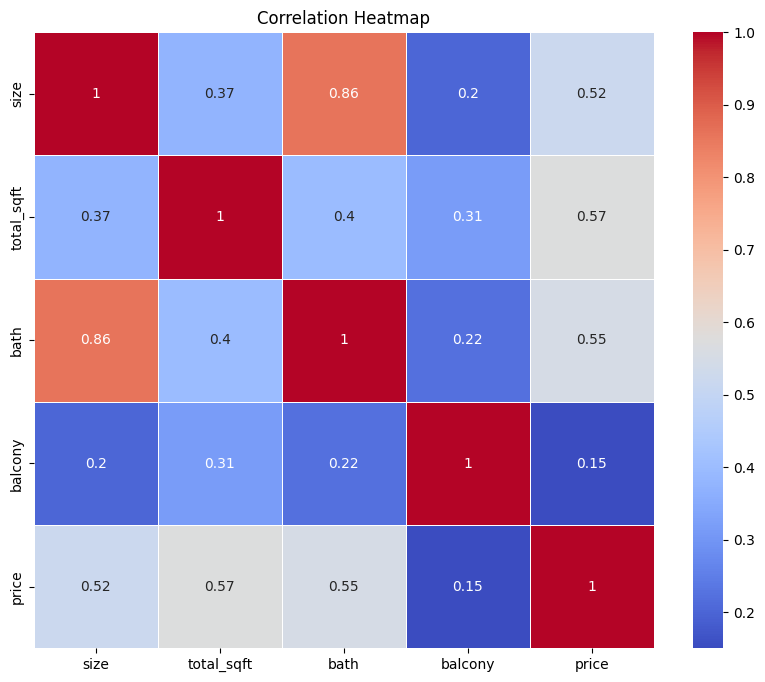

In [92]:
# For Correlation Matrix, to get a better idea about the relationship between numerical features with each other.
plt.figure(figsize=(10, 8))
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [93]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Splitting data into dependent and independent features
# 'X' contains all features except 'price', which is our target variable 'y'
X = data.drop('price', axis=1)
y = data['price']

# Splitting the dataset into training and testing sets
# Using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# One-Hot Encoding for categorical features
# This step transforms 'area_type' and 'location' columns into one-hot encoded format
ohe = OneHotEncoder()
column_trans = make_column_transformer(
    (OneHotEncoder(), ['area_type', 'location']),
    remainder='passthrough'
)


In [95]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10]
}

# Create a pipeline for Random Forest
rf_pipeline = make_pipeline(column_trans, RandomForestRegressor(random_state=0))

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1, scoring='r2')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score for Random Forest
print("Random Forest best parameters:", grid_search_rf.best_params_)
print("Random Forest best R-squared on training set:", grid_search_rf.best_score_)

# Evaluate on the test set
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print("Random Forest R-squared on test set:", r2_score(y_test, y_pred_rf))


Random Forest best parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__n_estimators': 300}
Random Forest best R-squared on training set: 0.635269196194438
Random Forest R-squared on test set: 0.6228792215977182


In [96]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__max_depth': [3, 6, 9],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2],
    'xgbregressor__subsample': [0.8, 0.9, 1.0]
}

# Create a pipeline for XGBoost
xgb_pipeline = make_pipeline(column_trans, XGBRegressor(random_state=0))

# GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, n_jobs=-1, scoring='r2')

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best parameters and best score for XGBoost
print("XGBoost best parameters:", grid_search_xgb.best_params_)
print("XGBoost best R-squared on training set:", grid_search_xgb.best_score_)

# Evaluate on the test set
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
print("XGBoost R-squared on test set:", r2_score(y_test, y_pred_xgb))


XGBoost best parameters: {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 6, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 1.0}
XGBoost best R-squared on training set: 0.6738631560932664
XGBoost R-squared on test set: 0.6652030513069112


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'decisiontreeregressor__max_depth': [None, 10, 20, 30],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline for Decision Tree
dt_pipeline = make_pipeline(column_trans, DecisionTreeRegressor(random_state=0))

# GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, n_jobs=-1, scoring='r2')

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Best parameters and best score for Decision Tree
print("Decision Tree best parameters:", grid_search_dt.best_params_)
print("Decision Tree best R-squared on training set:", grid_search_dt.best_score_)

# Evaluate on the test set
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
print("Decision Tree R-squared on test set:", r2_score(y_test, y_pred_dt))


Decision Tree best parameters: {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 10}
Decision Tree best R-squared on training set: 0.561477622970774
Decision Tree R-squared on test set: 0.5600939008109744


**Data Modeling**

In [98]:
# # Define a dictionary of models to evaluate
# # Including Linear Regression, Decision Tree, Random Forest, and XGBoost
# models = {
#     'Linear Regression': LinearRegression(),
#     'Decision Tree': DecisionTreeRegressor(),
#     'Random Forest': RandomForestRegressor(random_state=0),
#     'XGBoost': XGBRegressor(random_state=0)
# }

# # Iterate through each model, train it, and evaluate its performance
# for name, model in models.items():
#     # Create a pipeline that applies column transformations and then fits the model
#     pipe = make_pipeline(column_trans, model)
    
#     # Fit the model on the training data
#     pipe.fit(X_train, y_train)
    
#     # Predict on the test data
#     y_pred = pipe.predict(X_test)
    
#     # Calculate the R-squared score to evaluate model performance
#     score = r2_score(y_test, y_pred)
    
#     # Print the model name and its R-squared score
#     print(f"{name} R-squared: {score}")

# # Now we will train our meta-model using predictions from the base models
# # Obtain predictions from the base models for the test set
# y_pred_lr = models['Linear Regression'].predict(column_trans.transform(X_test))
# y_pred_dt = models['Decision Tree'].predict(column_trans.transform(X_test))
# y_pred_rf = models['Random Forest'].predict(column_trans.transform(X_test))

# Stack the predictions as new features for the meta-model
meta_features = np.column_stack((y_pred_rf, y_pred_xgb, y_pred_dt))

# Train the meta-model using the stacked features
meta_model = XGBRegressor(random_state=0)
meta_model.fit(meta_features, y_test)

# Predict using the meta-model
y_pred_stacked = meta_model.predict(meta_features)

# Calculating and printing the R-squared score for the stacked model
r2_stacked = r2_score(y_test, y_pred_stacked)
print("Stacked Model R-squared:", r2_stacked)


Stacked Model R-squared: 0.9408148486607323


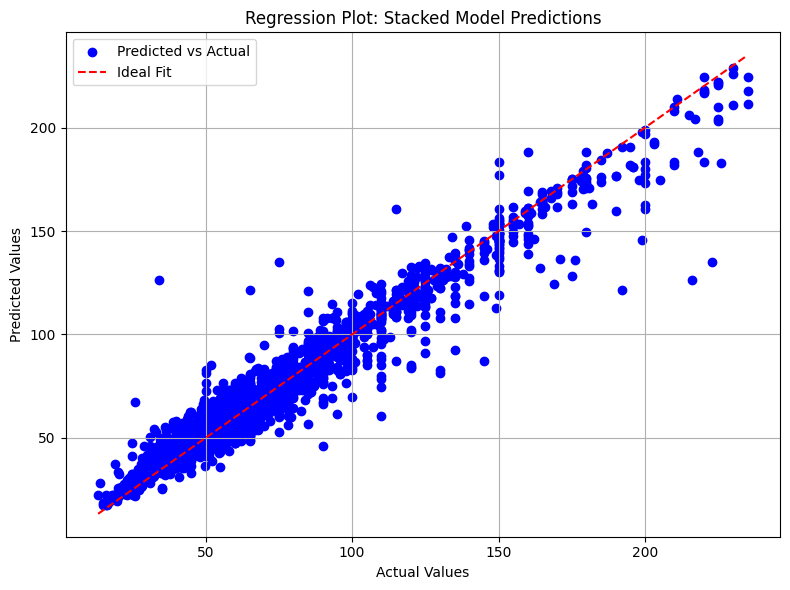

In [99]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_stacked, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Fit')
plt.title('Regression Plot: Stacked Model Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
# Creating a pipeline that first applies column transformations and then fits the meta-model
# 'column_trans' will handle the One-Hot Encoding for categorical features
# 'meta_model' is the model that will be trained using the transformed data
pipe = make_pipeline(column_trans, meta_model)

# Fitting the pipeline on the training data
# This step first transforms the training data using 'column_trans' and then fits 'meta_model' to the transformed data
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['area_type', 'location'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categoric...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [101]:
data.head(1)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07


In [102]:
predicted_price=pipe.predict(pd.DataFrame([['Super built-up Area','Haralur Road',2,1027,2.0,2.0]],
                                          columns=['area_type','location','size','total_sqft','bath','balcony']))

In [103]:
predicted_price

array([47.404648], dtype=float32)

In [53]:
import pickle

In [104]:
import pickle

# Saving the trained meta-model to a file
# 'model.pkl' is the file where the model will be saved
# 'wb' mode is used to write in binary format
with open('best_model.pkl', 'wb') as file:
    # 'pickle.dump' serializes the meta-model and saves it to the specified file
    pickle.dump(pipe, file)
